# Problem Statement

Try to build a classifier for the MNIST dataset that achieves over
97% accuracy on the test set.

#### import required packages:

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.datasets import fetch_openml

from sklearn.metrics import *

warnings.filterwarnings('ignore') # disable warnnings

#### loading the mnist dataset

In [47]:
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X = np.ascontiguousarray(X)
y = np.ascontiguousarray(y)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#### start experimenting with a knn classifier:

In [82]:
knn_clf = KNeighborsClassifier(n_jobs=-1)
knn_clf.fit(X_train, y_train)
y_pred = cross_val_predict(knn_clf, X_train, y_train, cv=5)

#### performace and Error Analysis:

In [130]:
cnf_mx = confusion_matrix(y_true=y_train, y_pred=y_pred)
norm_conf_mx = cnf_mx / cnf_mx.sum(axis=1, keepdims=True)

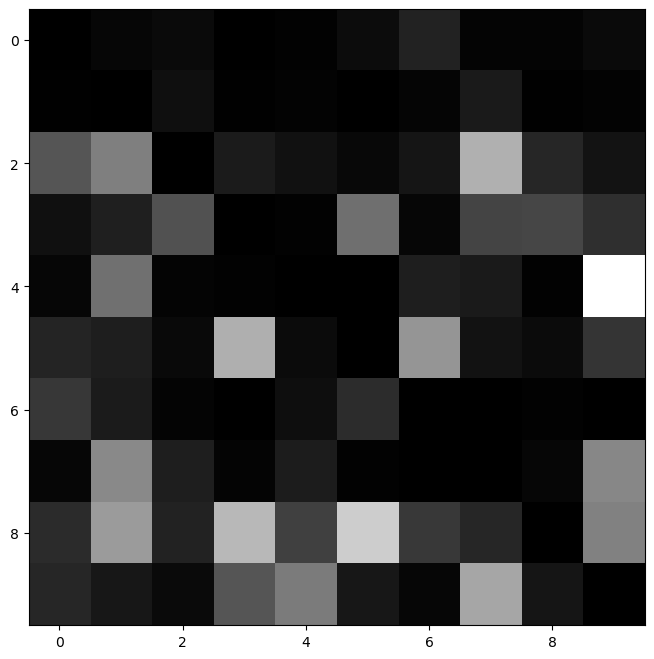

In [85]:
plt.figure(figsize=(8, 8))
np.fill_diagonal(norm_conf_mx, 0)
plt.imshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [134]:
def show_scores(y_true, y_pred, avg="weighted"):
    print("Precision: ", precision_score(y_true, y_pred, average=avg))
    print("Recall   : ", recall_score(y_true, y_pred, average=avg))
    print("Accuracy : ", accuracy_score(y_true, y_pred))
    print("F1       : ", f1_score(y_true, y_pred, average=avg))
    
show_scores(y_train, y_pred)

Precision:  0.9695000521830395
Recall   :  0.9692833333333334
Accuracy :  0.9692833333333334
F1       :  0.9692244573484365


#### Fine-tuning of *k* hyperparameter:

In [166]:
param_grid = {'n_neighbors': range(1, 10, 2)}
grid = GridSearchCV(KNeighborsClassifier(n_jobs=-1), param_grid, cv=5, n_jobs=-1, scoring='accuracy')

In [159]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 11)}, scoring='accuracy')

In [160]:
joblib.dump(grid, "grid.pkl")

['grid.pkl']

In [161]:
tuned_knn = grid.best_estimator_
tuned_knn

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [162]:
grid.best_score_

0.9700666666666666

In [163]:
y_pred_tuned = cross_val_predict(tuned_knn, X_train, y_train, cv=5)

In [164]:
show_scores(y_true=y_train, y_pred=y_pred_tuned)

Precision:  0.9702395438167466
Recall   :  0.9700666666666666
Accuracy :  0.9700666666666666
F1       :  0.9700020943485246


In [165]:
y_test_pred_tuned = tuned_knn.predict(X_test)
show_scores(y_true=y_test, y_pred=y_test_pred_tuned)

Precision:  0.9706882342922246
Recall   :  0.9705
Accuracy :  0.9705
F1       :  0.9704523390961245
